Trước khi bước vào dự đoán, đầu việc cần làm đầu tiên là làm sạch thêm dữ liệu trước đó. Dù dữ liệu này về cơ bản đã sạch, tuy nhiên do chủ đích muốn dự đoán thêm theo tiêu chí nhất định, cụ thể là tiêu chí mùa (xuân/hạ/thu/đông) nên ta cần làm giàu thêm cho dữ liệu gốc để thực hiện những dự đoán theo các tiêu chí mới này.

Ta thực hiện bước đầu tiên, khai báo các thư viện cần thiết, nhập về dữ liệu và cùng đó là xử lý dữ liệu.

## Bắt đầu

### 1. Khai báo thư viện

In [1]:
import numpy as np 
import pandas as pd

### 2. Nhập dữ liệu

In [2]:
absenteeism_data = pd.read_csv('cleaned-absenteeism-data.csv', delimiter=',')
absenteeism_data

,Reason_A,Reason_B,Reason_C,Reason_D,Month Value,Day In Week Value,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,5,2,179,22,40,237.656,22,1,2,0,8
696,1,0,0,0,5,2,225,26,28,237.656,24,0,1,2,3
697,1,0,0,0,5,3,330,16,28,237.656,25,1,0,0,8
698,0,0,0,1,5,3,235,16,32,237.656,25,1,0,0,2


### 3. Xử lý/làm giàu dữ liệu 

<b> Đầu tiên, ta thêm mùa vào dữ liệu. Cách thêm như sau:
- 0: mùa xuân (tháng 1, 2, 3)
- 1: mùa hè (tháng 4, 5, 6)
- 2: mùa thu (tháng 7, 8, 9)
- 3: mùa đông (tháng 10, 11, 12)

In [3]:
list_seasons = [(m - 1) // 3 for m in absenteeism_data['Month Value']]

In [4]:
list_seasons

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


Ta tạo thêm cột 'Season Value' để chứa các mùa vừa tạo.

In [5]:
absenteeism_data['Season Value'] = list_seasons

In [6]:
absenteeism_data

,Reason_A,Reason_B,Reason_C,Reason_D,Month Value,Day In Week Value,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Season Value
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4,2
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0,2
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2,2
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4,2
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,5,2,179,22,40,237.656,22,1,2,0,8,1
696,1,0,0,0,5,2,225,26,28,237.656,24,0,1,2,3,1
697,1,0,0,0,5,3,330,16,28,237.656,25,1,0,0,8,1
698,0,0,0,1,5,3,235,16,32,237.656,25,1,0,0,2,1


Do sẽ phân tích dự đoán theo mùa, do đó ta có thể loại bỏ cột 'Month Value' hiện tại ra khỏi dữ liệu gốc.

In [7]:
absenteeism_data.drop(['Month Value'], axis = 1)

,Reason_A,Reason_B,Reason_C,Reason_D,Day In Week Value,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Season Value
0,0,0,0,1,1,289,36,33,239.554,30,0,2,1,4,2
1,0,0,0,0,1,118,13,50,239.554,31,0,1,0,0,2
2,0,0,0,1,2,179,51,38,239.554,31,0,0,0,2,2
3,1,0,0,0,3,279,5,39,239.554,24,0,2,0,4,2
4,0,0,0,1,3,289,36,33,239.554,30,0,2,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,2,179,22,40,237.656,22,1,2,0,8,1
696,1,0,0,0,2,225,26,28,237.656,24,0,1,2,3,1
697,1,0,0,0,3,330,16,28,237.656,25,1,0,0,8,1
698,0,0,0,1,3,235,16,32,237.656,25,1,0,0,2,1


Sau đó ta sắp xếp lại các cột theo thứ tự mong muốn.

In [8]:
column_names_new = ['Reason_A', 'Reason_B', 'Reason_C', 'Reason_D', 'Season Value',
                    'Day In Week Value', 'Transportation Expense', 'Distance to Work', 'Age',
                    'Daily Work Load Average', 'Body Mass Index', 'Education', 'Children',
                    'Pets', 'Absenteeism Time in Hours']

In [9]:
absenteeism_data = absenteeism_data[column_names_new]

In [10]:
absenteeism_data

,Reason_A,Reason_B,Reason_C,Reason_D,Season Value,Day In Week Value,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,2,1,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,2,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,2,2,179,51,38,239.554,31,0,0,0,2
3,1,0,0,0,2,3,279,5,39,239.554,24,0,2,0,4
4,0,0,0,1,2,3,289,36,33,239.554,30,0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,1,2,179,22,40,237.656,22,1,2,0,8
696,1,0,0,0,1,2,225,26,28,237.656,24,0,1,2,3
697,1,0,0,0,1,3,330,16,28,237.656,25,1,0,0,8
698,0,0,0,1,1,3,235,16,32,237.656,25,1,0,0,2


Cuối cùng, ta tạo checkpoint và nhận dữ liệu sẵn sàng để dự đoán.

### Checkpoint

In [11]:
absenteeism_prediction = absenteeism_data.copy()

In [12]:
absenteeism_prediction

,Reason_A,Reason_B,Reason_C,Reason_D,Season Value,Day In Week Value,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,2,1,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,2,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,2,2,179,51,38,239.554,31,0,0,0,2
3,1,0,0,0,2,3,279,5,39,239.554,24,0,2,0,4
4,0,0,0,1,2,3,289,36,33,239.554,30,0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,1,2,179,22,40,237.656,22,1,2,0,8
696,1,0,0,0,1,2,225,26,28,237.656,24,0,1,2,3
697,1,0,0,0,1,3,330,16,28,237.656,25,1,0,0,8
698,0,0,0,1,1,3,235,16,32,237.656,25,1,0,0,2


## Chọn mô hình dự đoán

Việc dự đoán sẽ được thực hiện dựa trên các mô hình học máy (Machine Learning). Quy trình dự đoán sẽ gốm:
### 1. Nhập về các thư viện, module cần thiết:
- <b> Shap:</b> giải thích sức ảnh hưởng của mỗi thuộc tính trong mô hình.
- <b> Sklearn: </b> thư viện chứa các mô hình học máy của Python.
- <b> Các thư viện khác. </b>

In [13]:
import shap

from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split, cross_val_score, KFold
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline

from numpy import mean
from numpy import absolute

#tiêu chí đánh giá mô hình của chúng ta là mean absolute error (mae - sai số tuyệt đối trung bình)
from sklearn.metrics import mean_absolute_error

### 2. Chia dữ liệu vào các tệp để huấn luyện (train) và kiểm thử (test)

In [14]:
# x là dữ liệu bỏ cột dự đoán, y là cột cần dự đoán
x = absenteeism_prediction.drop(columns="Absenteeism Time in Hours")
y = absenteeism_prediction["Absenteeism Time in Hours"]

# Chia dữ liệu thành 2 phần, 80% để huấn luyện mô hình, 20% để kiểm thử
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=2025, shuffle=True)

In [15]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((560, 14), (140, 14), (560,), (140,))

In [16]:
# Nhập về các mô hình ML từ thư viện sklearn

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor #random forest, gradient boosting
from sklearn.tree import DecisionTreeRegressor #decision tree
from sklearn.linear_model import LinearRegression, Lasso, Ridge #linear regression, lasso, ridge 
from sklearn.svm import SVR #support vector regression (svr)
from sklearn.neighbors import KNeighborsRegressor #(knn)

In [17]:
random_forest = RandomForestRegressor()
gradient_boosting = GradientBoostingRegressor()
decision_tree = DecisionTreeRegressor(random_state=2025, criterion='absolute_error')
linear_reg = LinearRegression()
lasso = Lasso()
ridge = Ridge(random_state=2025)
sp_vecreg = SVR(kernel='linear')
knn = KNeighborsRegressor()

In [18]:
model = [random_forest, gradient_boosting, decision_tree, linear_reg, lasso, ridge, sp_vecreg, knn]

Sau khi nhập xong các mô hình, ta đánh giá và lựa chọn mô hình phù hợp cho dữ liệu thông qua 2 phương pháp, thẩm định chéo và đánh giá dựa trên dữ liệu kiểm thử. Tiêu chí sử dụng để đánh giá sẽ là sai số tuyệt đối trung bình (do dữ liệu có nhiều biến ngẫu nhiên (outliers)) và độ lệch chuẩn (std).

<b> 2 tiêu chí này có giá trị càng thấp, mô hình sẽ càng đáng tin cậy.

#### 1. Kiểm định chéo: Ta chia dữ liệu huấn luyện thành nhiều phần (8) và thử nghiệm chúng trên các mô hình để tìm mô hình hiệu quả nhất

In [19]:
# chia dữ liệu thành 8 phần, có xáo dữ liệu và random state (thể ngẫu nhiên) là 2025. Phần thể ngẫu nhiên nên được lựa chọn dựa trên thể 
# phù hợp nhất, tuy nhiên thể 2025 được lựa chọn theo năm dự án được thực hiện, chứ không có giá trị chọn thể định sẵn.
kf = KFold(n_splits=8, shuffle=True, random_state=2025)

In [20]:
score = []
avg = []
std = []

In [21]:
for i in model:
    estimator = Pipeline([
        ('scaling', RobustScaler()),
        ('model', i)])
    model_cv = cross_val_score(estimator, x_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
    score.append(model_cv)
    avg.append(mean(absolute(score)))
    std.append(model_cv.std())

In [22]:
pd.DataFrame({
    'model':['Random Forest', 'Gradient Boosting', 'Decision Tree', 'Linear Regression', 'Lasso', 'Ridge', 'SVR', 'KNN'],
    'mean MAE': avg,
    'sdev': std
}).set_index('model').sort_values(by='mean MAE')

,mean MAE,sdev
model,,
KNN,5.843489,1.295716
SVR,5.902457,1.330644
Random Forest,5.963069,1.381164
Ridge,6.160909,0.968350
Gradient Boosting,6.189859,1.472156
Lasso,6.209316,1.124770
Linear Regression,6.313736,0.981479
Decision Tree,6.434906,2.229049


Từ kiểm định chéo, ta nhận thấy KNN đang là mô hình đáng tin cậy hơn, với SVR là mô hình đáng tin cậy thứ hai.

Tuy nhiên, cần nhấn mạnh rằng <b> kiểm định chéo chỉ được thực hiện dựa trên dữ liệu huấn luyện. </b> Do đó, phương pháp này chỉ nên chiếm 30% trọng số đánh giá trong việc lựa chọn mô hình ML cho bài toán ban đầu.

#### 2. Sử dụng dữ liệu kiểm thử: 
Dùng dữ liệu kiểm thử (dữ liệu chính xác) từ bộ dữ liệu để đánh giá các phương pháp. Do phương pháp này dùng dữ liệu thật, ta sẽ cho nó chiếm trọng số lớn hơn (70%)

In [23]:
mae_score = []
std_test = []

In [24]:
for i in model:
    estimator = Pipeline([
        ('scaling', RobustScaler()),
        ('model', i)])
    estimator.fit(x_train, y_train)
    y_preds = estimator.predict(x_test)
    mae_score.append(mean_absolute_error(y_test, y_preds))
    std_test.append(np.std(mae_score))

Tạo các chỉ số theo tiêu chí vừa nói, nếu là phương pháp 1 sẽ nhân với 0.3, phương pháp 2 là 0.7.

In [25]:
fin_mae_score = [a*0.7 + b*0.3 for a, b in zip(mae_score, avg)]

In [26]:
fin_mae_score

[4.557320962816944,
 5.016739032424593,
 4.4929717841853325,
 5.327687598681036,
 5.060039488028123,
 5.251491224161655,
 4.004052244172463,
 4.761046665840628]

In [27]:
fin_std_score = [a*0.7 + b*0.3 for a, b in zip(std_test, std)]

In [28]:
fin_std_score

[0.41434930817115995,
 0.6373372940500958,
 0.9164420346690592,
 0.6324969086473435,
 0.651917201387077,
 0.6104420532545022,
 0.8199895272494433,
 0.7825852280191974]

In [29]:
pd.DataFrame({
    'model':['Random Forest', 'Gradient Boosting', 'Decision Tree', 'Linear Regression', 'Lasso', 'Ridge', 'SVR', 'KNN'],
    'MAE Score': fin_mae_score,
    'std': fin_std_score,
}).set_index('model').sort_values(by='MAE Score')

,MAE Score,std
model,,
SVR,4.004052,0.819990
Decision Tree,4.492972,0.916442
Random Forest,4.557321,0.414349
KNN,4.761047,0.782585
Gradient Boosting,5.016739,0.637337
Lasso,5.060039,0.651917
Ridge,5.251491,0.610442
Linear Regression,5.327688,0.632497


Từ bảng tổng kết phía trên, do ưu tiên MAE hơn, cũng như việc độ lệch chuẩn ở mức có thể đánh đổi (chấp nhận được do MAE có kết quả tích cực), ta lựa chọn SVR làm mô hình ML để dự đoán.

In [30]:
estimator = sp_vecreg

In [31]:
estimator.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

Tại đây, ta thực hiện tuning (điều chỉnh dự đoán).

In [32]:
hyperparam_space = {
    'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], #các mức phạt
    'epsilon': [0.1, 0.2, 0.3, 0.4, 0.5] #mức sai số không bị phạt
}

In [33]:
# Sử dụng thuật toán Grid Search để áp dụng mô hình ML, đồng thời tìm ra tham số tuning tốt nhất để dùng cho mô hình

grid_search = GridSearchCV(
    estimator,
    param_grid = hyperparam_space,
    cv = kf,
    scoring = 'neg_mean_absolute_error',
    n_jobs = -1                                       
)

In [34]:
grid_result = grid_search.fit(x_train, y_train)

In [35]:
# hiển thị các tham số tốt nhất cũng độ lệch chuẩn tốt nhất đạt được
print("Điểm số tốt nhất: %f, tham số sử dụng: %s" % (grid_result.best_score_, grid_result.best_params_))

Điểm số tốt nhất: -4.355053, tham số sử dụng: {'C': 1.0, 'epsilon': 0.2}


In [36]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

In [37]:
# hiển thị tất cả các tham số được đưa vào so sánh
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) với tham số: %r" % (mean, stdev, param))

-4.679640 (1.366614) với tham số: {'C': 0.1, 'epsilon': 0.1}
-4.675959 (1.358508) với tham số: {'C': 0.1, 'epsilon': 0.2}
-4.672261 (1.355221) với tham số: {'C': 0.1, 'epsilon': 0.3}
-4.676416 (1.352467) với tham số: {'C': 0.1, 'epsilon': 0.4}
-4.682164 (1.353283) với tham số: {'C': 0.1, 'epsilon': 0.5}
-4.624305 (1.343848) với tham số: {'C': 0.2, 'epsilon': 0.1}
-4.613818 (1.344486) với tham số: {'C': 0.2, 'epsilon': 0.2}
-4.604898 (1.339998) với tham số: {'C': 0.2, 'epsilon': 0.3}
-4.596893 (1.341885) với tham số: {'C': 0.2, 'epsilon': 0.4}
-4.598210 (1.339115) với tham số: {'C': 0.2, 'epsilon': 0.5}
-4.567161 (1.336203) với tham số: {'C': 0.3, 'epsilon': 0.1}
-4.556692 (1.334627) với tham số: {'C': 0.3, 'epsilon': 0.2}
-4.551048 (1.336481) với tham số: {'C': 0.3, 'epsilon': 0.3}
-4.539599 (1.337338) với tham số: {'C': 0.3, 'epsilon': 0.4}
-4.545197 (1.332526) với tham số: {'C': 0.3, 'epsilon': 0.5}
-4.510501 (1.328499) với tham số: {'C': 0.4, 'epsilon': 0.1}
-4.505195 (1.327744) với

In [38]:
# lựa chọn các tham số điều chỉnh
svr_tuning = SVR(C = 1, epsilon = 0.2, kernel = 'linear')
svr_tuning.fit(x_train, y_train)

SVR(C=1, epsilon=0.2, kernel='linear')

In [39]:
y_pred_tuning = svr_tuning.predict(x_test)
mae_tuning = mean_absolute_error(y_test, y_pred_tuning)

In [40]:
print('MAE Score After Tuning:', mae_tuning)

MAE Score After Tuning: 3.183443812822815


In [41]:
# so sánh mô hình trước và sua khi được điều chỉnh và đưa ra lựa chọn
print(f'''
Model Before Tuning : {mae_score[0]}
Model After Tuning : {mae_tuning}
''')


Model Before Tuning : 3.954857467532467
Model After Tuning : 3.183443812822815



Từ kết quả này, ta lựa chọn mô hình sau điều chỉnh làm mô hình dự đoán chính thức do có MAE thấp hơn.

#### 3. Đánh giá trọng số các thuộc tính trong mô hình.

In [42]:
#dùng svr_tuning do đây là mô hình đã có tham số điều chỉnh
#bước này dùng để tìm hệ số tương quan của mô hình đã lựa chọn
svr_coef = (svr_tuning.coef_).reshape((14,))

In [43]:
svr_coef_report = pd.DataFrame({
    "attributes":list(x),
    "coef": svr_coef  
})
svr_coef_report = svr_coef_report.sort_values(by='coef', ascending=False)
svr_coef_report

,attributes,coef
0,Reason_A,7.372988
2,Reason_C,7.319844
3,Reason_D,2.298667
1,Reason_B,1.284345
12,Children,0.215447
10,Body Mass Index,0.048138
6,Transportation Expense,0.004545
7,Distance to Work,0.000099
9,Daily Work Load Average,-0.002139
4,Season Value,-0.017913


Từ báo cáo hệ số tương quan phía trên, ta có thể có một vài thông tin hữu ích như sau:
- Trong số các lý do, <b> lý do A và C </b>là 2 lý do thường dẫn tới nhiều giờ vắng nhất.
- Nhân viên <b> có nhiều con </b> có xu hướng vắng mặt lâu hơn.
- Nhân viên có <b> học vấn trên Đại Học và có nhiều thú cưng </b> vắng mặt ít hơn.
- Các nhân viên thường <b> vắng nhiều hơn vào đầu tuần.

Sau đó ta đánh giá trọng số của mỗi thuộc tính đối với kết quả dự đoán sử dụng thư viện Shap.

In [44]:
explainer = shap.KernelExplainer(svr_tuning.predict, x_train)
shap_values = explainer(x_test)

Using 560 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/140 [00:00<?, ?it/s]

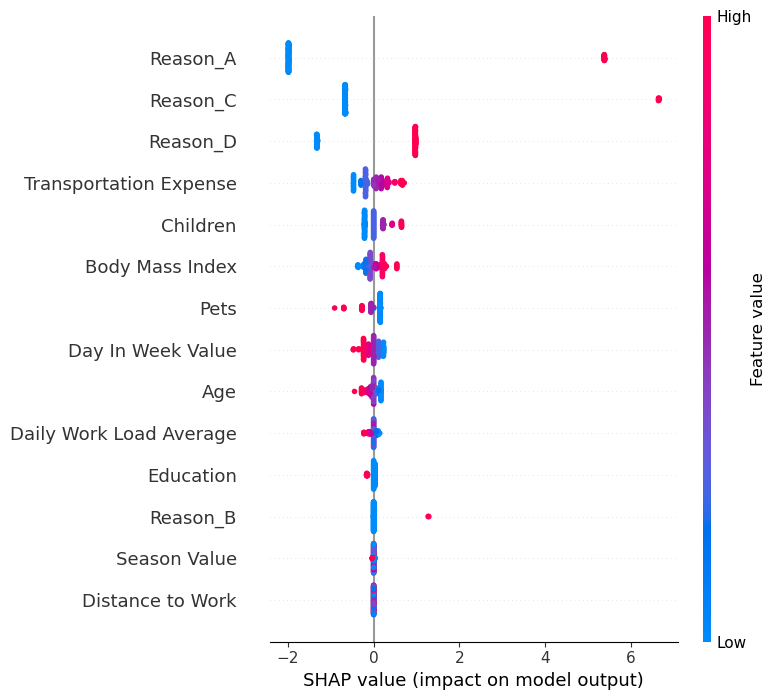

In [45]:
shap.summary_plot(shap_values)

Từ biểu đồ SHAP value trên, ta thấy <b> lý do A và C là hai thuộc tính có trọng số lớn nhất </b> đối với dự đoán số giờ vắng mặt. Các thuộc tính <b> khối lượng công việc trung bình hằng ngày (Daily Work Load Average), học vấn (Education), lý do B (Reason_B), mùa (Season Value) và khoảng cách đến nơi làm (Distance to Work) không quá ảnh hưởng tới dự đoán </b>. Trong các thuộc tính còn lại, <b> chi phí đi lại (Transportation Expense) đắt đỏ, có nhiều con (Children) và cơ thể có hệ số BMI (Body Mass Index) cao sẽ dẫn đến nhiều giờ vắng mặt hơn </b>, trong khi sở hữu <b> nhiều thú cưng (Pets), tuổi cao (Age) và những ngày (Day In Week Value) cuối tuần sẽ gây vắng mặt ít hơn.

Tiếp đó, ta thực hiện một dự đoán riêng cho dòng đầu tiên của dữ liệu kiểm thử.

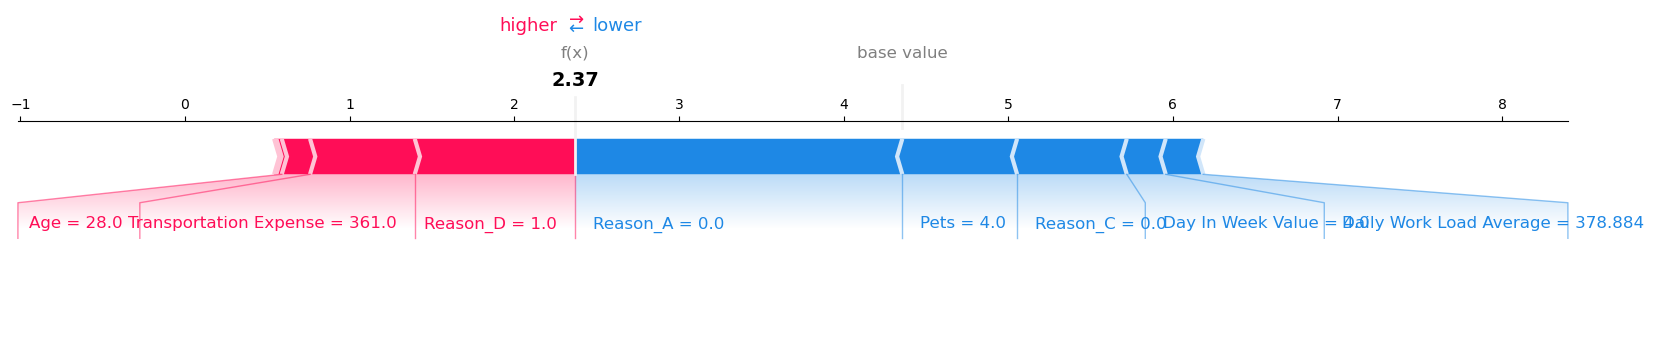

In [48]:
shap.initjs()
shap_values_1 = explainer.shap_values(x_test.iloc[0,:])
shap.force_plot(explainer.expected_value, shap_values_1, x_test.iloc[0,:], matplotlib=True, show=False)

Nhân viên đầu tiên trong dữ liệu kiểm thử được dự đoán sẽ vắng mặt 2.37 tiếng. Trong dữ liệu gốc, nhân viên này đã vắng mặt 8 tiếng, độ lệch của dự đoán là 5.63 tiếng.

### Checkpoint

In [49]:
absenteeism_origin = absenteeism_prediction.copy()

#### 4. Chạy mô hình dự đoán

In [50]:
#dữ liệu để dự đoán dựa trên
absenteeism_for_prediction = absenteeism_prediction.drop(['Absenteeism Time in Hours'], axis = 1)

In [51]:
absenteeism_for_prediction

,Reason_A,Reason_B,Reason_C,Reason_D,Season Value,Day In Week Value,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets
0,0,0,0,1,2,1,289,36,33,239.554,30,0,2,1
1,0,0,0,0,2,1,118,13,50,239.554,31,0,1,0
2,0,0,0,1,2,2,179,51,38,239.554,31,0,0,0
3,1,0,0,0,2,3,279,5,39,239.554,24,0,2,0
4,0,0,0,1,2,3,289,36,33,239.554,30,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,1,2,179,22,40,237.656,22,1,2,0
696,1,0,0,0,1,2,225,26,28,237.656,24,0,1,2
697,1,0,0,0,1,3,330,16,28,237.656,25,1,0,0
698,0,0,0,1,1,3,235,16,32,237.656,25,1,0,0


In [52]:
# tiến hành dự đoán
estimator = Pipeline([
    ('scaling', RobustScaler()),
    ('model', svr_tuning)])
estimator.fit(x_train,y_train)
y_preds = estimator.predict(absenteeism_for_prediction)

In [53]:
#tạo cột chứa kết quả dự đoán
absenteeism_origin['AITH_prediction'] = y_preds.round(2)

In [54]:
absenteeism_origin

,Reason_A,Reason_B,Reason_C,Reason_D,Season Value,Day In Week Value,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,AITH_prediction
0,0,0,0,1,2,1,289,36,33,239.554,30,0,2,1,4,3.50
1,0,0,0,0,2,1,118,13,50,239.554,31,0,1,0,0,0.20
2,0,0,0,1,2,2,179,51,38,239.554,31,0,0,0,2,2.67
3,1,0,0,0,2,3,279,5,39,239.554,24,0,2,0,4,8.13
4,0,0,0,1,2,3,289,36,33,239.554,30,0,2,1,2,3.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,1,2,179,22,40,237.656,22,1,2,0,8,7.52
696,1,0,0,0,1,2,225,26,28,237.656,24,0,1,2,3,7.60
697,1,0,0,0,1,3,330,16,28,237.656,25,1,0,0,8,7.97
698,0,0,0,1,1,3,235,16,32,237.656,25,1,0,0,2,2.40


### Checkpoint cuối cùng

In [55]:
absenteeism_predicted = absenteeism_origin.copy()

In [56]:
absenteeism_predicted

,Reason_A,Reason_B,Reason_C,Reason_D,Season Value,Day In Week Value,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,AITH_prediction
0,0,0,0,1,2,1,289,36,33,239.554,30,0,2,1,4,3.50
1,0,0,0,0,2,1,118,13,50,239.554,31,0,1,0,0,0.20
2,0,0,0,1,2,2,179,51,38,239.554,31,0,0,0,2,2.67
3,1,0,0,0,2,3,279,5,39,239.554,24,0,2,0,4,8.13
4,0,0,0,1,2,3,289,36,33,239.554,30,0,2,1,2,3.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,1,2,179,22,40,237.656,22,1,2,0,8,7.52
696,1,0,0,0,1,2,225,26,28,237.656,24,0,1,2,3,7.60
697,1,0,0,0,1,3,330,16,28,237.656,25,1,0,0,8,7.97
698,0,0,0,1,1,3,235,16,32,237.656,25,1,0,0,2,2.40


### Xuất dữ liệu ra file .csv

In [57]:
absenteeism_predicted.to_csv('absenteeism-prediction.csv', index = False)

In [58]:
absenteeism_predicted = pd.read_csv('absenteeism-prediction.csv', delimiter = ',')
absenteeism_predicted

,Reason_A,Reason_B,Reason_C,Reason_D,Season Value,Day In Week Value,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,AITH_prediction
0,0,0,0,1,2,1,289,36,33,239.554,30,0,2,1,4,3.50
1,0,0,0,0,2,1,118,13,50,239.554,31,0,1,0,0,0.20
2,0,0,0,1,2,2,179,51,38,239.554,31,0,0,0,2,2.67
3,1,0,0,0,2,3,279,5,39,239.554,24,0,2,0,4,8.13
4,0,0,0,1,2,3,289,36,33,239.554,30,0,2,1,2,3.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,1,2,179,22,40,237.656,22,1,2,0,8,7.52
696,1,0,0,0,1,2,225,26,28,237.656,24,0,1,2,3,7.60
697,1,0,0,0,1,3,330,16,28,237.656,25,1,0,0,8,7.97
698,0,0,0,1,1,3,235,16,32,237.656,25,1,0,0,2,2.40
